In [1]:
import warnings
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics

warnings.filterwarnings('ignore')

### Data preparation

In [2]:
df = pd.read_csv('data/covid19-clean.csv')
df['Date'] = df['Date'].apply(lambda row: datetime.strptime(row, "%d %B %Y "))

In [3]:
data = df[['Date', 'Confirmed daily']]
data.columns = ['ds', 'y']

# Modeling

### Model creation

In [4]:
model_args = {
    'seasonality_mode': 'additive', 
    'changepoint_prior_scale': 0.6,
    'weekly_seasonality': 10,
    'yearly_seasonality': False,
    'daily_seasonality': False
}

In [5]:
model = Prophet(**model_args)
model.fit(data[40:])

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [6]:
future = model.make_future_dataframe(periods = 1)
forecast = model.predict(future)

In [7]:
forecast['y'] = model.history['y']
forecast[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,y,yhat,yhat_lower,yhat_upper
64,2020-06-09,400.0,412.489115,321.532006,506.278364
65,2020-06-10,282.0,408.760013,314.855617,506.447217
66,2020-06-11,359.0,401.856865,308.017174,505.066256
67,2020-06-12,376.0,422.754260,326.559575,531.721167
68,2020-06-13,440.0,417.566764,318.472472,515.385170
69,2020-06-14,375.0,417.479209,325.806832,510.792587
70,2020-06-15,396.0,407.084486,317.813552,500.818047
71,2020-06-16,407.0,430.718954,332.433180,525.769795
72,2020-06-17,506.0,426.989851,329.265340,513.630288
73,2020-06-18,NaN,420.086704,323.970133,519.225819


### Model explanation

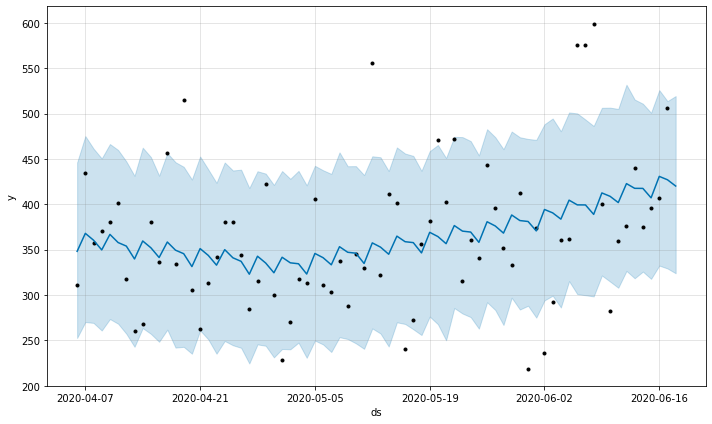

In [8]:
fig = model.plot(forecast)

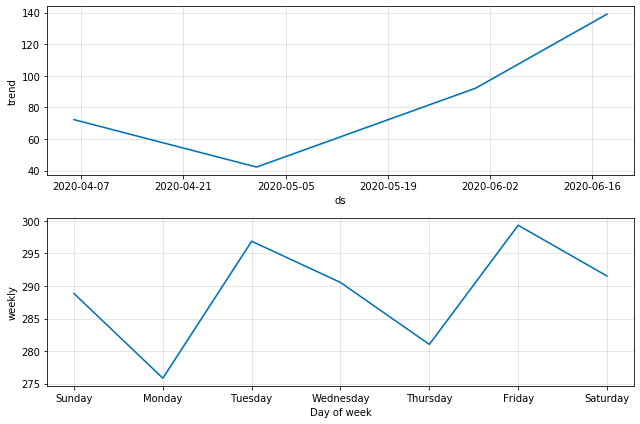

In [9]:
fig = model.plot_components(forecast)

### Model performance

In [10]:
results = cross_validation(model, initial = '65 days', horizon = '1 day', period = '1 day')
metrics = performance_metrics(results)

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-06-10 00:00:00 and 2020-06-16 00:00:00


In [11]:
results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-06-11,406.705673,309.932491,507.049572,359.0,2020-06-10
1,2020-06-12,422.939274,324.026185,523.147851,376.0,2020-06-11
2,2020-06-13,405.958373,307.011729,507.028674,440.0,2020-06-12
3,2020-06-14,415.398801,317.705649,511.532576,375.0,2020-06-13
4,2020-06-15,398.312066,301.280136,495.708814,396.0,2020-06-14
5,2020-06-16,421.882439,325.215904,511.591604,407.0,2020-06-15
6,2020-06-17,405.725476,310.887005,498.598809,506.0,2020-06-16


In [12]:
metrics

,horizon,mse,rmse,mae,mape,mdape,coverage
0,1 days,2507.405003,50.073995,40.936343,0.097628,0.10773,0.857143


### Tomorrow prediction

In [13]:
np.round(forecast.iloc[-1]['yhat']).astype(int)

420